# Progress reports automation

In [ ]:
#!pip install pypdf PyPDF2 numpy pandas matplotlib tqdm regex

In [1]:
# pypdf
from pypdf import PdfReader
from PyPDF2 import PdfReader
import PyPDF2

import numpy as np
import pandas as pd
import seaborn as sns
import re
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

from utils import *
from ETL_pipeline import *

%load_ext autoreload
%autoreload 2

DIR_PLOTS_DASHBOARD = "./../E-Shuleni-Dashboard/plots/"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Case 1: If first week of month (No need to substract data)

### Load PDF, preprocess and extract data

- Set the correct values below

In [2]:
DIR = "./../Pilot 2025/Data Enuma LMS/"
month = "October"
month_abrev = "oct"
date = "31"

In [3]:
# Grade 3
pdf_path_3A = DIR + f"{month}/progress_reports_{month_abrev}_3A_{date}.pdf"
pdf_path_3B = DIR + f"{month}/progress_reports_{month_abrev}_3B_{date}.pdf"

print(pdf_path_3A)
print(pdf_path_3B)

# Grade 4
pdf_path_4A = DIR + f"{month}/progress_reports_{month_abrev}_4A_{date}.pdf"
pdf_path_4B = DIR + f"{month}/progress_reports_{month_abrev}_4B_{date}.pdf"
#
print(pdf_path_4A)
print(pdf_path_4B)

./../Pilot 2025/Data Enuma LMS/October/progress_reports_oct_3A_31.pdf
./../Pilot 2025/Data Enuma LMS/October/progress_reports_oct_3B_31.pdf
./../Pilot 2025/Data Enuma LMS/October/progress_reports_oct_4A_31.pdf
./../Pilot 2025/Data Enuma LMS/October/progress_reports_oct_4B_31.pdf


- Extract data from Stream A & B

In [4]:
df_3A = extract_data(pdf_path_3A, stream = "3A", verbose = True)
df_3B = extract_data(pdf_path_3B, stream = "3B", verbose = True)

df_4A = extract_data(pdf_path_4A, stream = "4A", verbose = True)
df_4B = extract_data(pdf_path_4B, stream = "4B", verbose = True)

print(f"Class 3A: {df_3A.shape}\nClass 3B: {df_3B.shape}\nClass 4A: {df_4A.shape}\nClass 4B: {df_4B.shape}")
display(df_3A.head(1), df_3B.head(1), df_4A.head(1), df_4B.head(1))

Length of the pdf: 67 pages
Pages containing the keyword 'Progress Report': [1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68]
Length of the pdf: 34 pages
Pages containing the keyword 'Progress Report': [1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35]
Length of the pdf: 39 pages
Pages containing the keyword 'Progress Report': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
Length of the pdf: 44 pages
Pages containing the keyword 'Progress Report': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]
Class 3A: 

,Name,Lesson Completed,Hours On Program,English Test Taken,English Test with Excellent/Good,Overall Percentage Score,Mastered Course,Mastered Level,Class
0,AIVIN URIO,25,0.0,4,3,75,None,None,3A


,Name,Lesson Completed,Hours On Program,English Test Taken,English Test with Excellent/Good,Overall Percentage Score,Mastered Course,Mastered Level,Class
0,Alice Muhando,18,0.0,3,3,100,None,None,3B


,Name,Lesson Completed,Hours On Program,English Test Taken,English Test with Excellent/Good,Overall Percentage Score,Mastered Course,Mastered Level,Class
0,Beautiful Godman Akyoo,7,0.0,2,0,0,None,None,4A


,Name,Lesson Completed,Hours On Program,English Test Taken,English Test with Excellent/Good,Overall Percentage Score,Mastered Course,Mastered Level,Class
0,ADVENTINA ISACK AKYOO,8,0.0,1,1,100,None,None,4B


# Flag students

Criterias:

1. **Priority Performance**

- red = priority 1
    - Overall Percentage Score < 50%
- yellow = priority 2
    - 50% <= Overall Percentage Score <= 75%
- green = priority 3
    - Overall Percentage Score >= 75%
- purple = priority 0
    - Hours On Program < 1h


In [ ]:
# Flag students per performance
df_3A = flag_students_per_perf(df_3A)
df_3B = flag_students_per_perf(df_3B)
df_4A = flag_students_per_perf(df_4A)
df_4B = flag_students_per_perf(df_4B)

In [6]:
display(df_3A.head(1))

,Name,Lesson Completed,Hours On Program,English Test Taken,English Test with Excellent/Good,Overall Percentage Score,Mastered Course,Mastered Level,Class,Priority Perf
0,AIVIN URIO,11.0,0.0,2.0,1.0,50.0,None,None,3A,2


In [ ]:
# concatenate all df and save
df_all = pd.concat([df_3A, df_3B, df_4A, df_4B]).reset_index(drop=True)
print(df_all['Class'].value_counts())
#print(df_all['Priority Perf'].value_counts())
print(df_all.shape)
df_all.head(2)

Class
3A    61
4B    44
4A    39
3B    31
Name: count, dtype: int64
(175, 9)


,Name,Lesson Completed,Hours On Program,English Test Taken,English Test with Excellent/Good,Overall Percentage Score,Mastered Course,Mastered Level,Class
0,AIVIN URIO,25,0.0,4,3,75,None,None,3A
1,ALICE AKYOO,36,0.0,6,4,67,None,None,3A


### Remove kids that left the program

In [7]:
df_all = remove_OOP_students(df_all)
print(df_all.shape)
df_all.head(2)

Number of students that left the program: 20
Removed 12 students from data
(163, 9)


,Name,Lesson Completed,Hours On Program,English Test Taken,English Test with Excellent/Good,Overall Percentage Score,Mastered Course,Mastered Level,Class
0,AIVIN URIO,25,0.0,4,3,75,None,None,3A
1,ALICE AKYOO,36,0.0,6,4,67,None,None,3A


In [ ]:
# Save all streams data to an Excel file
df_all.to_excel(DIR + f'{month}/progress_reports_{month_abrev}_all_streams_{date}.xlsx', index=False)

In [19]:
# Quality check
# set columns to float
#for col in ["Lesson Completed", "Hours On Program", "English Test Taken", "English Test with Excellent/Good", "Overall Percentage Score"]:
#    df_all[col] = df_all[col].astype(float)
# verify values are correct
#fig, axs = plt.subplots(1, 5, figsize=(15, 4))
#sns.histplot(df_all['Lesson Completed'], bins=20, ax=axs[0])
#sns.histplot(df_all['Hours On Program'], bins=20, ax=axs[1])
#sns.histplot(df_all['English Test Taken'], bins=20, ax=axs[2])
#sns.histplot(df_all['English Test with Excellent/Good'], bins=20, ax=axs[3])
#sns.histplot(df_all['Overall Percentage Score'], ax=axs[4])
## rotate labels by 45 degrees
#axs[4].set_xticklabels(axs[4].get_xticklabels(), rotation=45)
#plt.tight_layout()
#plt.show()

## Pie charts

In [ ]:
# Plot pie charts for all streams and save figure as HTML file
fig = plot_piecharts_all_new_plotly(df_all, 
                                    layout="1x4", 
                                    hole = 0.7, 
                                    output_file=DIR_PLOTS_DASHBOARD + f"student_performance_priority.html",
                                    )
fig.show()

Plot saved as ./../E-Shuleni-Dashboard/plots/student_performance_priority.html


## Table intervention

In [14]:
intervention_table = create_new_intervention_table(df_all)
print(intervention_table.shape)
intervention_table.head(2)

(164, 9)


,Student,Class,Priority Perf,Nb Lessons,Addressed,Issue,Action proposed,Action Taken,Unit failed
0,GRACIOUS NYITI,3A,0,0.0,NaN,NaN,NaN,NaN,NaN
1,Maximillian Revocatus,3A,0,0.0,NaN,NaN,NaN,NaN,NaN


In [15]:
intervention_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Student          164 non-null    object
 1   Class            164 non-null    object
 2   Priority Perf    164 non-null    object
 3   Nb Lessons       164 non-null    object
 4   Addressed        0 non-null      object
 5   Issue            0 non-null      object
 6   Action proposed  0 non-null      object
 7   Action Taken     0 non-null      object
 8   Unit failed      0 non-null      object
dtypes: object(9)
memory usage: 11.7+ KB


In [16]:
intervention_table.to_excel(DIR + f'{month}/intervention_table_{month}_{date}.xlsx', index=False)

# Case 2: If not first week of month (Need to substract data)

### Load PDF, preprocess and extract data

- Set the correct values below

In [ ]:
DIR = "./../Pilot 2025/Data Enuma LMS/"
month = "October"
month_abrev = "oct"
date = "31"

In [ ]:
# Grade 3
pdf_path_3A = DIR + f"{month}/progress_reports_{month_abrev}_3A_{date}.pdf"
pdf_path_3B = DIR + f"{month}/progress_reports_{month_abrev}_3B_{date}.pdf"

print(pdf_path_3A)
print(pdf_path_3B)

# Grade 4
pdf_path_4A = DIR + f"{month}/progress_reports_{month_abrev}_4A_{date}.pdf"
pdf_path_4B = DIR + f"{month}/progress_reports_{month_abrev}_4B_{date}.pdf"
#
print(pdf_path_4A)
print(pdf_path_4B)

./../Pilot 2025/Data Enuma LMS/October/progress_reports_oct_3A_31.pdf
./../Pilot 2025/Data Enuma LMS/October/progress_reports_oct_3B_31.pdf
./../Pilot 2025/Data Enuma LMS/October/progress_reports_oct_4A_31.pdf
./../Pilot 2025/Data Enuma LMS/October/progress_reports_oct_4B_31.pdf


- Extract data from Stream A & B

In [ ]:
df_3A = extract_data(pdf_path_3A, stream = "3A", verbose = True)
df_3B = extract_data(pdf_path_3B, stream = "3B", verbose = True)

df_4A = extract_data(pdf_path_4A, stream = "4A", verbose = True)
df_4B = extract_data(pdf_path_4B, stream = "4B", verbose = True)

print(f"Class 3A: {df_3A.shape}\nClass 3B: {df_3B.shape}\nClass 4A: {df_4A.shape}\nClass 4B: {df_4B.shape}")
display(df_3A.head(1), df_3B.head(1), df_4A.head(1), df_4B.head(1))

Length of the pdf: 67 pages
Pages containing the keyword 'Progress Report': [1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68]
Length of the pdf: 34 pages
Pages containing the keyword 'Progress Report': [1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35]
Length of the pdf: 39 pages
Pages containing the keyword 'Progress Report': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
Length of the pdf: 44 pages
Pages containing the keyword 'Progress Report': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]
Class 3A: 

,Name,Lesson Completed,Hours On Program,English Test Taken,English Test with Excellent/Good,Overall Percentage Score,Mastered Course,Mastered Level,Class
0,AIVIN URIO,25,0.0,4,3,75,None,None,3A


,Name,Lesson Completed,Hours On Program,English Test Taken,English Test with Excellent/Good,Overall Percentage Score,Mastered Course,Mastered Level,Class
0,Alice Muhando,18,0.0,3,3,100,None,None,3B


,Name,Lesson Completed,Hours On Program,English Test Taken,English Test with Excellent/Good,Overall Percentage Score,Mastered Course,Mastered Level,Class
0,Beautiful Godman Akyoo,7,0.0,2,0,0,None,None,4A


,Name,Lesson Completed,Hours On Program,English Test Taken,English Test with Excellent/Good,Overall Percentage Score,Mastered Course,Mastered Level,Class
0,ADVENTINA ISACK AKYOO,8,0.0,1,1,100,None,None,4B


# Flag students

Criterias:

1. **Priority Performance**

- red = priority 1
    - Overall Percentage Score < 50%
- yellow = priority 2
    - 50% <= Overall Percentage Score <= 75%
- green = priority 3
    - Overall Percentage Score >= 75%
- purple = priority 0
    - Hours On Program < 1h


In [ ]:
# concatenate all df and save
df_all = pd.concat([df_3A, df_3B, df_4A, df_4B]).reset_index(drop=True)
print(df_all['Class'].value_counts())
#print(df_all['Priority Perf'].value_counts())
print(df_all.shape)
df_all.head(2)

Class
3A    61
4B    44
4A    39
3B    31
Name: count, dtype: int64
(175, 9)


,Name,Lesson Completed,Hours On Program,English Test Taken,English Test with Excellent/Good,Overall Percentage Score,Mastered Course,Mastered Level,Class
0,AIVIN URIO,25,0.0,4,3,75,None,None,3A
1,ALICE AKYOO,36,0.0,6,4,67,None,None,3A


### Remove kids that left the program

In [ ]:
df_all = remove_OOP_students(df_all)
print(df_all.shape)
df_all.head(2)

Number of students that left the program: 20
Removed 12 students from data
(163, 9)


,Name,Lesson Completed,Hours On Program,English Test Taken,English Test with Excellent/Good,Overall Percentage Score,Mastered Course,Mastered Level,Class
0,AIVIN URIO,25,0.0,4,3,75,None,None,3A
1,ALICE AKYOO,36,0.0,6,4,67,None,None,3A


In [ ]:
# Save all streams data to an Excel file
df_all.to_excel(DIR + f'{month}/progress_reports_{month_abrev}_all_streams_{date}.xlsx', index=False)

### Substract dataframe to previous week to allow a week by week comparison

In [ ]:
# Set the value of last_date_test to the previous date for comparison
# last_date_test is typically the previous friday
DIR_TEST = "./../Pilot 2025/Data Enuma LMS/"
month_test = "October"
month_abrev_test = "oct"
last_date_test = "24"
df_old = pd.read_excel(DIR_TEST + f"{month_test}/progress_reports_{month_abrev_test}_all_streams_{last_date_test}.xlsx")
df_new = pd.read_excel(DIR_TEST + f"{month_test}/progress_reports_{month_abrev_test}_all_streams_{date}.xlsx")

# check same students in two dataframes
if set(df_old['Name'].tolist()) == set(df_new['Name'].tolist()):
    print("Same students in both datasets and some order✅")
else:
    print("Be careful: names not in the same order or not same names!⚠️")
    
    missing_students = set(df_old['Name'].tolist()) - set(df_new['Name'].tolist())
    new_students = set(df_new['Name'].tolist()) - set(df_old['Name'].tolist())
    if len(missing_students) > 0:
        print(f"Missing students in the new dataset:\n{missing_students}")
        # add missing students with same values to new dataset
        df_new = pd.concat([df_new, df_old[df_old['Name'].isin(missing_students)]])
    if len(new_students) > 0:
        print(f"New students in the new dataset:\n{new_students}")
        # add new students with all values set to 0 to old dataset
        df_new_students = pd.DataFrame(columns = df_old.columns)
        for new_idx, student in enumerate(new_students):
            stream = df_new[df_new['Name'] == student]['Class'].values[0]
            df_new_students.loc[new_idx] = [student, 0, 0, 0, 0, 0, 0, 0, stream, 0]
        df_old = pd.concat([df_old, df_new_students], ignore_index=True)

# new check
if set(df_old['Name'].tolist()) == set(df_new['Name'].tolist()):
    print("After update: Same students in both datasets and same order✅")
    # set column Name in index for both dataframes and make sure they have the index in same order
    df_old.set_index('Name', inplace=True)
    df_new.set_index('Name', inplace=True)
    # align index of two dataframes
    df_old = df_old.loc[df_new.index]
    # reset index as normal
    df_old.reset_index(inplace=True)
    df_new.reset_index(inplace=True)
else:
    print("Be careful: still names not in the same order or not same names!⚠️")
print(df_old.shape, df_new.shape)
display(df_old.head(2), df_new.head(2))


Same students in both datasets and some order✅
After update: Same students in both datasets and same order✅
(163, 9) (163, 9)


,Name,Lesson Completed,Hours On Program,English Test Taken,English Test with Excellent/Good,Overall Percentage Score,Mastered Course,Mastered Level,Class
0,AIVIN URIO,25,0,4.0,3.0,75.0,NaN,NaN,3A
1,ALICE AKYOO,36,0,6.0,4.0,67.0,NaN,NaN,3A


,Name,Lesson Completed,Hours On Program,English Test Taken,English Test with Excellent/Good,Overall Percentage Score,Mastered Course,Mastered Level,Class
0,AIVIN URIO,25,0,4.0,3.0,75.0,NaN,NaN,3A
1,ALICE AKYOO,36,0,6.0,4.0,67.0,NaN,NaN,3A


In [11]:
df_updated = remove_last_N_days(df_old, df_new)
print(df_updated.shape)
print(df_updated['Class'].value_counts())
df_updated.head()

(163, 9)
Class
3A    54
4B    42
4A    37
3B    30
Name: count, dtype: int64


,Name,Lesson Completed,Hours On Program,English Test Taken,English Test with Excellent/Good,Overall Percentage Score,Mastered Course,Mastered Level,Class
0,AIVIN URIO,0,0,0.0,0.0,NaN,NaN,NaN,3A
1,ALICE AKYOO,0,0,0.0,0.0,NaN,NaN,NaN,3A
2,ANGEL KITOMARI,0,0,0.0,0.0,NaN,6.0,11-12,3A
3,ANTELGOD PALANGYO,0,0,0.0,0.0,NaN,NaN,NaN,3A
4,Arafat Jonas,0,0,0.0,0.0,NaN,NaN,NaN,3A


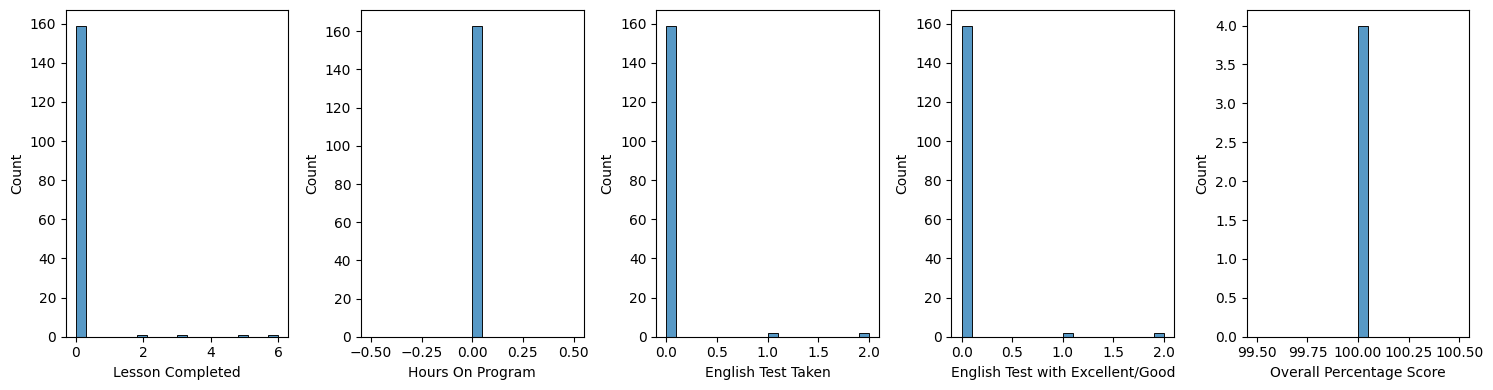

In [12]:
# verify values are correct
fig, axs = plt.subplots(1, 5, figsize=(15, 4))
sns.histplot(df_updated['Lesson Completed'], bins=20, ax=axs[0])
sns.histplot(df_updated['Hours On Program'], bins=20, ax=axs[1])
sns.histplot(df_updated['English Test Taken'], bins=20, ax=axs[2])
sns.histplot(df_updated['English Test with Excellent/Good'], bins=20, ax=axs[3])
sns.histplot(df_updated['Overall Percentage Score'], bins=20, ax=axs[4])
plt.tight_layout()
plt.show()

In [13]:
# recompute flagging per stream
df_updated_3A = df_updated[df_updated['Class'] == '3A'].reset_index(drop=True)
df_updated_3B = df_updated[df_updated['Class'] == '3B'].reset_index(drop=True)
df_updated_4A = df_updated[df_updated['Class'] == '4A'].reset_index(drop=True)
df_updated_4B = df_updated[df_updated['Class'] == '4B'].reset_index(drop=True)

df_updated_3A = flag_students_per_perf(df_updated_3A)
df_updated_3B = flag_students_per_perf(df_updated_3B)
df_updated_4A = flag_students_per_perf(df_updated_4A)
df_updated_4B = flag_students_per_perf(df_updated_4B)

df_updated_merged = pd.concat([df_updated_3A, 
                               df_updated_3B, 
                               df_updated_4A, 
                               df_updated_4B,
                               ], axis=0).reset_index(drop=True)
print(f"Number of students: {len(df_updated_merged)}")

# clean names
#df_updated_merged["Name"] = df_updated_merged["Name"].apply(clean_name)
print(df_updated_merged['Class'].value_counts())
df_updated_merged.head(2)

Number of students: 163
Class
3A    54
4B    42
4A    37
3B    30
Name: count, dtype: int64


,Name,Lesson Completed,Hours On Program,English Test Taken,English Test with Excellent/Good,Overall Percentage Score,Mastered Course,Mastered Level,Class,Priority Perf
0,AIVIN URIO,0.0,0.0,0.0,0.0,NaN,NaN,NaN,3A,0
1,ALICE AKYOO,0.0,0.0,0.0,0.0,NaN,NaN,NaN,3A,0


### Remove kids that left the program

In [14]:
left_students = pd.read_excel('./../Pilot 2025/Data Enuma LMS/students_out_of_program_2025.xlsx')

df_updated_merged = remove_OOP_students(df_updated_merged)
print(df_updated_merged.shape)
df_updated_merged.head(2)

Number of students that left the program: 20
Removed 0 students from data
(163, 10)


,Name,Lesson Completed,Hours On Program,English Test Taken,English Test with Excellent/Good,Overall Percentage Score,Mastered Course,Mastered Level,Class,Priority Perf
0,AIVIN URIO,0.0,0.0,0.0,0.0,NaN,NaN,NaN,3A,0
1,ALICE AKYOO,0.0,0.0,0.0,0.0,NaN,NaN,NaN,3A,0


In [15]:
df_updated_merged.to_excel(DIR + f'{month}/progress_reports_{month_abrev}_all_streams_{last_date_test}_{date}.xlsx', index=False)

In [16]:
fig = plot_piecharts_all_new_plotly(df_updated_merged, 
                                    layout="1x4", 
                                    hole = 0.7, 
                                    output_file=DIR_PLOTS_DASHBOARD + f"student_performance_priority.html",
                                    )  
fig.show()

Plot saved as ./../E-Shuleni-Dashboard/plots/student_performance_priority.html


### Create intervention table

In [39]:
intervention_table = create_new_intervention_table(df_updated_merged)
print(intervention_table.shape)
print(intervention_table['Priority Perf'].value_counts())
intervention_table.head(2)

(163, 9)
Priority Perf
0    97
3    49
1     9
2     8
Name: count, dtype: int64


,Student,Class,Priority Perf,Nb Lessons,Addressed,Issue,Action proposed,Action Taken,Unit failed
0,ALICE AKYOO,3A,0,0.0,NaN,NaN,NaN,NaN,NaN
1,Arafat Jonas,3A,0,0.0,NaN,NaN,NaN,NaN,NaN
